# 📌 K-Means Clustering: In-Depth with Examples

## 🧠 1. Intuition
K-Means aims to group data into **K clusters** such that points in the same cluster are similar, and points in different clusters are dissimilar.

#### Example:
Suppose you have the following 2D points representing customer locations:

`(1,2), (1,4), (1,0), (10,2), (10,4), (10,0)`

We want to group them into $K=2$ clusters.

## 🧮 2. Mathematical Steps
Let $X = \{x_1, x_2, ..., x_n\}$ be your dataset, $x_i \in \mathbb{R}^d$.

### 🔹 Step 1: Initialization
Randomly select **K data points (paraemter) ** as the **initial centroids**.

Let’s say for our 6-point example and $K=2$, we choose:
`\mu_1 = (1,2), \mu_2 = (10,2)`

### 🔹 Step 2: Assignment Step
Assign each point $x_i$ to the closest centroid using Euclidean distance:
$$
C_i = \arg\min_j \|x_i - \mu_j\|^2
$$

### 🔹 Step 3: Update Step
Recalculate centroids as the mean of the points assigned to that cluster:
$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

### 🔹 Step 4: Iterate
Repeat Steps 2 and 3 until the centroids **no longer change** significantly.

## 🎯 3. Objective Function
We minimize the **within-cluster sum of squared errors (SSE)**:
$$
J = \sum_{j=1}^K \sum_{x_i \in C_j} \|x_i - \mu_j\|^2
$$
This cost measures **how tightly the points are clustered around their centroids**.

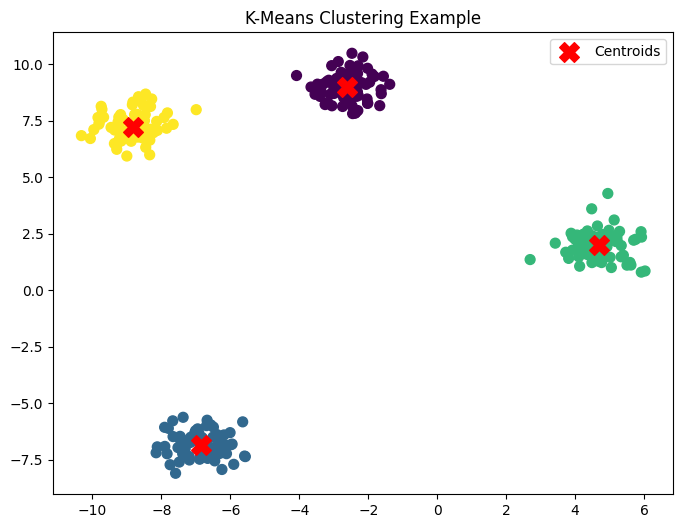

In [1]:
# 🐍 4. Python Example
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()

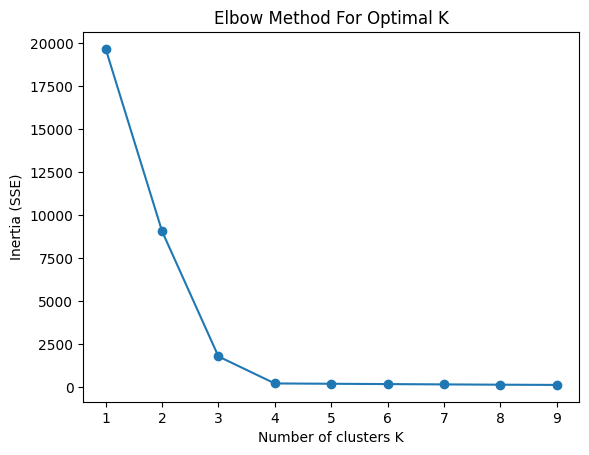

In [2]:
# 📉 5. Elbow Method
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

## ⚠️ 6. Limitations
- Must pre-specify $K$
- Sensitive to initial centroids
- Struggles with non-spherical clusters
- Affected by outliers

## ✅ 7. Summary Table
| Concept          | Formula / Description                                           |
|------------------|-----------------------------------------------------------------|
| Objective        | $J = \sum_{j=1}^K \sum_{x_i \in C_j} \|x_i - \mu_j\|^2$         |
| Assignment       | $C_i = \arg\min_j \|x_i - \mu_j\|^2$                            |
| Centroid Update  | $\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$                |
| Convergence      | Repeat until centroids stabilize                                |
| Evaluation       | Use SSE or silhouette score; try Elbow method for $K$          |

## 🎥 8. K-Means Iteration Animation
Below is an animation showing the centroid movement over 10 iterations of K-means clustering on synthetic data.

![K-Means Animation](data/kmeans_animation.gif)